# Inferencia de Ingresos

## Importando datasets

In [1140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [1141]:
df_hacienda = pd.read_csv("Datasets/clean/Clean_Minis_Hacienda.csv")
df_juventud = pd.read_csv("Datasets/clean/Clean_Minis_Juventud.csv")
df_mujer = pd.read_csv("Datasets/clean/Clean_Minis_Mujer.csv")
df_publico = pd.read_csv("Datasets/clean/Clean_Minis_Publico.csv")
df_trabajo = pd.read_csv("Datasets/clean/Clean_Minis_Trabajo.csv")

In [1142]:
df_mujer.drop(columns=['Unnamed: 0'], axis=1 , inplace=True)
df_mujer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nombre        330 non-null    object 
 1   Cargo         330 non-null    object 
 2   Departamento  330 non-null    object 
 3   Sexo          330 non-null    object 
 4   Sueldo bruto  330 non-null    float64
 5   AFP           330 non-null    float64
 6   SFS           330 non-null    float64
 7   Sueldo neto   330 non-null    float64
dtypes: float64(4), object(4)
memory usage: 20.8+ KB


In [1143]:
df_hacienda.drop(columns=['Unnamed: 0'], axis=1 , inplace=True)
df_hacienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nombre        777 non-null    object 
 1   Cargo         777 non-null    object 
 2   Departamento  777 non-null    object 
 3   Sexo          777 non-null    object 
 4   Sueldo bruto  777 non-null    float64
 5   AFP           777 non-null    float64
 6   SFS           777 non-null    float64
 7   Sueldo neto   777 non-null    float64
dtypes: float64(4), object(4)
memory usage: 48.7+ KB


In [1144]:
df_publico.drop(columns=['Unnamed: 0'], axis=1 , inplace=True)
df_publico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8767 entries, 0 to 8766
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nombre        8767 non-null   object 
 1   Cargo         8767 non-null   object 
 2   Departamento  8767 non-null   object 
 3   Sexo          8767 non-null   object 
 4   Sueldo bruto  8767 non-null   float64
 5   AFP           8767 non-null   float64
 6   SFS           8767 non-null   float64
 7   Sueldo neto   8767 non-null   float64
dtypes: float64(4), object(4)
memory usage: 548.1+ KB


In [1145]:
#Juventud
df_juventud.insert(0,'Ministerio','Juventud')
df_juventud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ministerio    290 non-null    object 
 1   Nombre        290 non-null    object 
 2   Cargo         290 non-null    object 
 3   Departamento  290 non-null    object 
 4   Sexo          290 non-null    object 
 5   Sueldo bruto  290 non-null    float64
 6   AFP           290 non-null    float64
 7   SFS           290 non-null    float64
 8   Sueldo neto   290 non-null    float64
dtypes: float64(4), object(5)
memory usage: 20.5+ KB


In [1146]:
#Mujer
df_mujer.insert(0,'Ministerio','Mujer')
df_mujer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ministerio    330 non-null    object 
 1   Nombre        330 non-null    object 
 2   Cargo         330 non-null    object 
 3   Departamento  330 non-null    object 
 4   Sexo          330 non-null    object 
 5   Sueldo bruto  330 non-null    float64
 6   AFP           330 non-null    float64
 7   SFS           330 non-null    float64
 8   Sueldo neto   330 non-null    float64
dtypes: float64(4), object(5)
memory usage: 23.3+ KB


In [1147]:
#Hacienda
df_hacienda.insert(0,'Ministerio','Hacienda')
df_hacienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ministerio    777 non-null    object 
 1   Nombre        777 non-null    object 
 2   Cargo         777 non-null    object 
 3   Departamento  777 non-null    object 
 4   Sexo          777 non-null    object 
 5   Sueldo bruto  777 non-null    float64
 6   AFP           777 non-null    float64
 7   SFS           777 non-null    float64
 8   Sueldo neto   777 non-null    float64
dtypes: float64(4), object(5)
memory usage: 54.8+ KB


In [1148]:
#Publico
df_publico.insert(0,'Ministerio','Publico')
df_publico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8767 entries, 0 to 8766
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ministerio    8767 non-null   object 
 1   Nombre        8767 non-null   object 
 2   Cargo         8767 non-null   object 
 3   Departamento  8767 non-null   object 
 4   Sexo          8767 non-null   object 
 5   Sueldo bruto  8767 non-null   float64
 6   AFP           8767 non-null   float64
 7   SFS           8767 non-null   float64
 8   Sueldo neto   8767 non-null   float64
dtypes: float64(4), object(5)
memory usage: 616.6+ KB


In [1149]:
#Trabajo
df_trabajo.insert(0,'Ministerio','Trabajo')
df_trabajo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ministerio    877 non-null    object 
 1   Nombre        877 non-null    object 
 2   Cargo         877 non-null    object 
 3   Departamento  877 non-null    object 
 4   Sexo          877 non-null    object 
 5   Sueldo bruto  877 non-null    object 
 6   AFP           877 non-null    float64
 7   SFS           877 non-null    float64
 8   Sueldo neto   877 non-null    object 
dtypes: float64(2), object(7)
memory usage: 61.8+ KB


## Unificación de datasets

In [1150]:
df_ministerios = pd.concat([df_mujer, df_hacienda, df_publico, df_juventud, df_trabajo])
df_ministerios.drop(columns= ['Departamento','Nombre'], axis=1,inplace= True)
df_ministerios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11041 entries, 0 to 876
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ministerio    11041 non-null  object 
 1   Cargo         11041 non-null  object 
 2   Sexo          11041 non-null  object 
 3   Sueldo bruto  11041 non-null  object 
 4   AFP           11041 non-null  float64
 5   SFS           11041 non-null  float64
 6   Sueldo neto   11041 non-null  object 
dtypes: float64(2), object(5)
memory usage: 690.1+ KB


In [1151]:
df_ministerios

,Ministerio,Cargo,Sexo,Sueldo bruto,AFP,SFS,Sueldo neto
0,Mujer,MINISTRO (A) DE LA MUJER,FEMENINO,300000.0,8610.0,4943.8,221471.46
1,Mujer,MENSAJERO INTERNO,FEMENINO,25000.0,717.5,760.0,23497.5
2,Mujer,SECRETARIA,FEMENINO,27000.0,774.9,820.8,25279.3
3,Mujer,ASESOR,FEMENINO,23000.0,660.1,699.2,20222.7
4,Mujer,SECRETARIA EJECUTIVA,FEMENINO,40000.0,1148.0,1216.0,37168.35
...,...,...,...,...,...,...,...
872,Trabajo,ANALISTA,MASCULINO,"41.000,00",4087.7,4153.3,"37.968,11"
873,Trabajo,SOPORTE ADMINISTRATIVO,MASCULINO,"46.000,00",4586.2,4659.8,"41.966,94"
874,Trabajo,SECRETARIO (A),FEMENINO,"34.000,00",3389.8,3444.2,"31.965,60"
875,Trabajo,SECRETARIO (A),FEMENINO,"34.000,00",3389.8,3444.2,"31.965,60"


## Procesamiento de datos

In [1152]:
# Normalizando la caracteristica Sexo
df_ministerios.rename(columns={"Sexo": "Es_Masculino"}, inplace=True)

df_ministerios["Es_Masculino"] = df_ministerios["Es_Masculino"].apply(lambda genero:  0 if "f" in genero.lower() else 1).astype("int64")

In [1153]:
# Normalizando la caracteristica Sueldo bruto
types = {}
for bruto in df_ministerios["Sueldo bruto"]:
    tipo = str(type(bruto))
    if tipo not in types:
        types[tipo] = 0
    types[tipo] += 1

print(types)

{"<class 'float'>": 10164, "<class 'str'>": 877}


In [1154]:
def convertir_a_float(bruto):
    try:
        return float(bruto)
    except ValueError:
        return float(bruto.replace('.', '').replace(',', '.'))

# Aplicar la función a la columna "Sueldo bruto"
df_ministerios["Sueldo bruto"] = df_ministerios["Sueldo bruto"].apply(convertir_a_float)

In [1155]:
# Normalizando la caracteristica Sueldo neto
types = {}
for bruto in df_ministerios["Sueldo neto"]:
    tipo = str(type(bruto))
    if tipo not in types:
        types[tipo] = 0
    types[tipo] += 1

print(types)

{"<class 'float'>": 10164, "<class 'str'>": 877}


In [1156]:
def convertir_a_float(bruto):
    try:
        return float(bruto)
    except ValueError:
        return float(bruto.replace('.', '').replace(',', '.'))

# Aplicar la función a la columna "Sueldo bruto"
df_ministerios["Sueldo neto"] = df_ministerios["Sueldo neto"].apply(convertir_a_float)

In [1157]:
# route
file_name = 'Datasets/Clean_Ministerios.csv'

# saving the excel
df_ministerios.to_csv(file_name)
print('df_ministerios is written to CSV File successfully.')

df_ministerios is written to CSV File successfully.


### Columnas Categoricas

In [1158]:
counts = df_ministerios["Cargo"].value_counts(normalize=True)*100
counts

Cargo
AGENTE  VTP                                                 13.757812
AUXILIAR ADMINISTRATIVO                                      6.638891
ABOGADO (A) I                                                6.013948
CONSERJE                                                     5.678833
FISCALIZADOR                                                 4.483290
                                                              ...    
Coordinador de Organismos Internacionales                    0.009057
Analista de Estudios y Políticas Tributarias I               0.009057
Analista de Estudios y Proyecciones de la Recaudación II     0.009057
Analista Recursos Humanos I                                  0.009057
ENCARGADO UNIDAD                                             0.009057
Name: proportion, Length: 745, dtype: float64

In [1159]:
df_ministerios["Cargo"].value_counts(normalize=True)*100

#Estandarizando los Abogados
df_ministerios['Cargo'] = df_ministerios['Cargo'].apply(lambda x: "ABOGADO" if re.search("ABOGAD", x) else x)

Abogados = df_ministerios[df_ministerios['Cargo'].str.contains("ABOGAD")]['Cargo']
Abogados.value_counts()

  

Cargo
ABOGADO    845
Name: count, dtype: int64

In [1160]:
# funcion para normalizar columnas
def normalize_column(column_name, field_name, field_new_name, df):
    df[column_name] = df[column_name].apply\
    (
        lambda x: field_new_name.upper() if re.search(field_name.upper(), str(x.upper())) else x.upper()
    )
    print(f"Se normalizó el campo {field_new_name}")


In [1161]:
# Normalizando el campo secretaria
normalize_column('Cargo', "SECRETARI", "SECRETARIO", df_ministerios)
normalize_column('Cargo', "SEC\.", "SECRETARIO", df_ministerios)

Se normalizó el campo SECRETARIO
Se normalizó el campo SECRETARIO


<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\oniel\AppData\Local\Temp\ipykernel_21076\3284197886.py:3: SyntaxWarning: invalid escape sequence '\.'
  normalize_column('Cargo', "SEC\.", "SECRETARIO", df_ministerios)


In [1162]:
# Normalizando el campo secretario
Secretario = df_ministerios[df_ministerios['Cargo'].str.contains("SECRETARI")]['Cargo']
Secretario.value_counts()

Cargo
SECRETARIO    733
Name: count, dtype: int64

In [1163]:
# Normalizando campo analista
normalize_column('Cargo', "ANALIST", "ANALISTA", df_ministerios)

Se normalizó el campo ANALISTA


In [1164]:
# revisando los valores de analista
Analista = df_ministerios[df_ministerios['Cargo'].str.contains("ANALIST")]['Cargo']
Analista.value_counts()

Cargo
ANALISTA    375
Name: count, dtype: int64

In [1165]:
# Normalizando campo ENCARGADO 
normalize_column('Cargo', "ENCARGAD", "ENCARGADO", df_ministerios)
normalize_column('Cargo', "ENC\.", "ENCARGADO", df_ministerios)

Se normalizó el campo ENCARGADO
Se normalizó el campo ENCARGADO


<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\oniel\AppData\Local\Temp\ipykernel_21076\2804071411.py:3: SyntaxWarning: invalid escape sequence '\.'
  normalize_column('Cargo', "ENC\.", "ENCARGADO", df_ministerios)


In [1166]:
# revisando los valores de encargado
Encargado = df_ministerios[df_ministerios['Cargo'].str.contains("ENCARGAD")]['Cargo']
Encargado.value_counts()

Cargo
ENCARGADO    720
Name: count, dtype: int64

In [1167]:
# Normalizando campo coordinador 
normalize_column('Cargo', "COORDINAD", "COORDINADOR", df_ministerios)

Se normalizó el campo COORDINADOR


In [1168]:
# revisando los valores de coordinador
Coordinador = df_ministerios[df_ministerios['Cargo'].str.contains("COORDINAD")]['Cargo']
Coordinador.value_counts()

Cargo
COORDINADOR    166
Name: count, dtype: int64

In [1169]:
# Normalizando campo Fiscalizador 
normalize_column('Cargo', "FISCALIZAD", "FISCALIZADOR", df_ministerios)

Se normalizó el campo FISCALIZADOR


In [1170]:
# revisando Fiscalizador
Fiscalizador = df_ministerios[df_ministerios['Cargo'].str.contains("FISCALIZAD")]['Cargo']
Fiscalizador.value_counts()

Cargo
FISCALIZADOR    498
Name: count, dtype: int64

In [1171]:
# Normalizando campo INSPECTOR 
normalize_column('Cargo', "INSPECT", "INSPECTOR", df_ministerios)

Se normalizó el campo INSPECTOR


In [1172]:
# Normalizando campo INSPECTOR 
normalize_column('Cargo', "INSPECT", "INSPECTOR", df_ministerios)

Se normalizó el campo INSPECTOR


In [1173]:
# Normalizando campo SUPERVISOR 
normalize_column('Cargo', "SUPERVI", "SUPERVISOR", df_ministerios)

Se normalizó el campo SUPERVISOR


In [1174]:
# revisando SUPERVISOR
var = df_ministerios[df_ministerios['Cargo'].str.contains("SUPERVI")]['Cargo']
var.value_counts()

Cargo
SUPERVISOR    279
Name: count, dtype: int64

In [1175]:
# Normalizando campo CHOFER 
normalize_column('Cargo', "CHOF", "CHOFER", df_ministerios)

Se normalizó el campo CHOFER


In [1176]:
# revisando chofer
var = df_ministerios[df_ministerios['Cargo'].str.contains("CHOF")]['Cargo']
var.value_counts()

Cargo
CHOFER    497
Name: count, dtype: int64

In [1177]:
# Normalizando campo ADMINISTRADOR 
normalize_column('Cargo', "ADMINISTRAD", "ADMINISTRADOR", df_ministerios)

Se normalizó el campo ADMINISTRADOR


In [1178]:
# revisando ADMINISTRADOR
var = df_ministerios[df_ministerios['Cargo'].str.contains("ADMINISTRAD")]['Cargo']
var.value_counts()

Cargo
ADMINISTRADOR    35
Name: count, dtype: int64

In [1179]:
# Normalizando campo INSPECTOR 
normalize_column('Cargo', "DISE", "DISEÑADOR", df_ministerios)

Se normalizó el campo DISEÑADOR


In [1180]:
# revisando DISEÑADOR
var = df_ministerios[df_ministerios['Cargo'].str.contains("DISE")]['Cargo']
var.value_counts()

Cargo
DISEÑADOR    18
Name: count, dtype: int64

In [1181]:
# Normalizando campo OPERADOR 
normalize_column('Cargo', "OPERAD", "OPERADOR", df_ministerios)

Se normalizó el campo OPERADOR


In [1182]:
# revisando OPERADOR
var = df_ministerios[df_ministerios['Cargo'].str.contains("OPERAD")]['Cargo']
var.value_counts()

Cargo
OPERADOR    22
Name: count, dtype: int64

In [1183]:
# Normalizando campo AUXILIAR  
normalize_column('Cargo', "AUX", "AUXILIAR", df_ministerios)

Se normalizó el campo AUXILIAR


In [1184]:
# revisando AUXILIAR 
var = df_ministerios[df_ministerios['Cargo'].str.contains("AUXILI")]['Cargo']
var.value_counts()

Cargo
AUXILIAR    1176
Name: count, dtype: int64

In [1185]:
# Normalizando campo ORIENTADOR 
normalize_column('Cargo', "ORIENT", "ORIENTADOR", df_ministerios)

Se normalizó el campo ORIENTADOR


In [1186]:
# revisando ORIENTADOR
var = df_ministerios[df_ministerios['Cargo'].str.contains("ORIENT")]['Cargo']
var.value_counts()

Cargo
ORIENTADOR    7
Name: count, dtype: int64

In [1187]:
# Normalizando campo MENSAJERO  
normalize_column('Cargo', "MENSAJ", "MENSAJERO", df_ministerios)

Se normalizó el campo MENSAJERO


In [1188]:
# revisando MENSAJERO
var = df_ministerios[df_ministerios['Cargo'].str.contains("MENSAJ")]['Cargo']
var.value_counts()

Cargo
MENSAJERO    304
Name: count, dtype: int64

In [1189]:
# Normalizando campo SUBDIRECTOR   
normalize_column('Cargo', "SUBDIREC", "SUBDIRECTOR", df_ministerios)
normalize_column('Cargo', "SUB-DIREC", "SUBDIRECTOR", df_ministerios)

Se normalizó el campo SUBDIRECTOR
Se normalizó el campo SUBDIRECTOR


In [1190]:
# revisando SUBDIRECTOR
var = df_ministerios[df_ministerios['Cargo'].str.contains("SUBDIREC")]['Cargo']
var.value_counts()

Cargo
SUBDIRECTOR    110
Name: count, dtype: int64

In [1191]:
# Normalizando campo SOPORTE  
normalize_column('Cargo', "SOPOR", "SOPORTE", df_ministerios)

Se normalizó el campo SOPORTE


In [1192]:
# revisando SOPORTE
var = df_ministerios[df_ministerios['Cargo'].str.contains("SOPOR")]['Cargo']
var.value_counts()

Cargo
SOPORTE    99
Name: count, dtype: int64

In [1193]:
# Normalizando campo VICEMINISTRO                   
normalize_column('Cargo', "VICE", "VICEMINISTRO", df_ministerios)

Se normalizó el campo VICEMINISTRO


In [1194]:
# revisando VICEMINISTRO                 
var = df_ministerios[df_ministerios['Cargo'].str.contains("VICEMINIS")]['Cargo']
var.value_counts()

Cargo
VICEMINISTRO    31
Name: count, dtype: int64

In [1195]:
# Normalizando campo TECNICO   
normalize_column('Cargo', "TECNI", "TECNICO", df_ministerios)
normalize_column('Cargo', "TÉCNI", "TECNICO", df_ministerios)

Se normalizó el campo TECNICO
Se normalizó el campo TECNICO


In [1196]:
# revisando TECNICO
var = df_ministerios[df_ministerios['Cargo'].str.contains("TECNI")]['Cargo']
var.value_counts()

Cargo
TECNICO    482
Name: count, dtype: int64

In [1197]:
# Normalizando campo   
normalize_column('Cargo', "DIRECTOR ", "DIRECTOR", df_ministerios)
normalize_column('Cargo', "DIRECTORA", "DIRECTOR", df_ministerios)
normalize_column('Cargo', "DIRECTOR\(A\)", "DIRECTOR", df_ministerios)

Se normalizó el campo DIRECTOR
Se normalizó el campo DIRECTOR
Se normalizó el campo DIRECTOR


<>:4: SyntaxWarning: invalid escape sequence '\('
<>:4: SyntaxWarning: invalid escape sequence '\('
C:\Users\oniel\AppData\Local\Temp\ipykernel_21076\2228616404.py:4: SyntaxWarning: invalid escape sequence '\('
  normalize_column('Cargo', "DIRECTOR\(A\)", "DIRECTOR", df_ministerios)


In [1198]:
# revisando ORIENTADOR
var = df_ministerios[df_ministerios['Cargo'].str.contains("DIRECTOR")]['Cargo']
var.value_counts()

Cargo
SUBDIRECTOR     110
DIRECTOR         80
SUB DIRECTOR      1
Name: count, dtype: int64

In [1199]:
# Normalizando campo psicologo
normalize_column('Cargo', "PSICO", "PSICOLOGO", df_ministerios)

Se normalizó el campo PSICOLOGO


In [1200]:
# revisando PSIICOLOGO
var = df_ministerios[df_ministerios['Cargo'].str.contains("PSICO")]['Cargo']
var.value_counts()

Cargo
PSICOLOGO    19
Name: count, dtype: int64

In [1201]:
# Normalizando campo ASESOR 
normalize_column('Cargo', "ASES", "ASESOR", df_ministerios)

Se normalizó el campo ASESOR


In [1202]:
# revisando ASESOR 
var = df_ministerios[df_ministerios['Cargo'].str.contains("ASES")]['Cargo']
var.value_counts()

Cargo
ASESOR    26
Name: count, dtype: int64

In [1203]:
# Normalizando campo MINISTRO 
normalize_column('Cargo', "MINISTRO ", "MINISTRO", df_ministerios)

Se normalizó el campo MINISTRO


In [1204]:
# revisando MINISTRO 
var = df_ministerios[df_ministerios['Cargo'].str.contains("MINISTRO")]['Cargo']
var.value_counts()

Cargo
VICEMINISTRO              31
MINISTRO                   4
ASISTENTE DEL MINISTRO     1
Name: count, dtype: int64

In [1205]:
# Normalizando campo AGENTE  
normalize_column('Cargo', "AGENT", "AGENTE", df_ministerios)

Se normalizó el campo AGENTE


In [1206]:
# revisando AGENTE 
var = df_ministerios[df_ministerios['Cargo'].str.contains("AGENTE")]['Cargo']
var.value_counts()

Cargo
AGENTE    1546
Name: count, dtype: int64

In [1207]:
# Normalizando campo ingeniero
normalize_column('Cargo', "INGENI", "INGENIERO", df_ministerios)

Se normalizó el campo INGENIERO


In [1208]:
# revisando ORIENTADOR
var = df_ministerios[df_ministerios['Cargo'].str.contains("INGENIERO")]['Cargo']
var.value_counts()

Cargo
INGENIERO    19
Name: count, dtype: int64

In [1209]:
# Normalizando campo PROCURADOR
normalize_column('Cargo', "PROCURA", "PROCURADOR", df_ministerios)

Se normalizó el campo PROCURADOR


In [1210]:
# revisando PROCURADOR 
var = df_ministerios[df_ministerios['Cargo'].str.contains("PROCURA")]['Cargo']
var.value_counts()

Cargo
PROCURADOR    712
Name: count, dtype: int64

In [1211]:
# Normalizando campo PROGRAMADOR
normalize_column('Cargo', "PROGRAM", "PROGRAMADOR", df_ministerios)

Se normalizó el campo PROGRAMADOR


In [1212]:
# revisando PROGRAMADOR 
var = df_ministerios[df_ministerios['Cargo'].str.contains("PROGRAM")]['Cargo']
var.value_counts()

Cargo
PROGRAMADOR    7
Name: count, dtype: int64

In [1213]:
# Normalizando campo MEDICO
normalize_column('Cargo', "MEDIC", "MEDICO", df_ministerios)
normalize_column('Cargo', "MÉDIC", "MEDICO", df_ministerios)

Se normalizó el campo MEDICO
Se normalizó el campo MEDICO


In [1214]:
# revisando MEDICO 
var = df_ministerios[df_ministerios['Cargo'].str.contains("MEDIC")]['Cargo']
var.value_counts()

Cargo
MEDICO    237
Name: count, dtype: int64

In [1215]:
# Normalizando campo PARALEGAL
normalize_column('Cargo', "PARA", "PARALEGAL", df_ministerios)

Se normalizó el campo PARALEGAL


In [1216]:
# revisando PARALEGAL 
var = df_ministerios[df_ministerios['Cargo'].str.contains("PARA")]['Cargo']
var.value_counts()

Cargo
PARALEGAL    96
Name: count, dtype: int64

In [1217]:
#NORMALIZANDO EL CAMPO educador
normalize_column('Cargo', "EDUC", "EDUCADOR", df_ministerios)

Se normalizó el campo EDUCADOR


In [1218]:
# revisando ASESOR 
var = df_ministerios[df_ministerios['Cargo'].str.contains("EDUC")]['Cargo']
var.value_counts()

Cargo
EDUCADOR    90
Name: count, dtype: int64

In [1219]:
var = df_ministerios[df_ministerios['Cargo'].str.contains("EDUC")]['Cargo']
var.value_counts()

Cargo
EDUCADOR    90
Name: count, dtype: int64

In [1220]:
values = df_ministerios['Cargo'].value_counts(normalize=True)*100

#NORMALIZANDO EL CAMPO OTROS
Otros = list(values[values < 1].index)
df_ministerios['Cargo'] = df_ministerios['Cargo'].apply(lambda x: "OTROS" if x in Otros else x)
df_ministerios['Cargo'].value_counts()

Cargo
AGENTE          1546
OTROS           1484
AUXILIAR        1176
ABOGADO          845
SECRETARIO       733
ENCARGADO        720
PROCURADOR       712
CONSERJE         694
FISCALIZADOR     498
CHOFER           497
TECNICO          482
ANALISTA         375
MENSAJERO        304
SUPERVISOR       279
MEDICO           237
INSPECTOR        179
COORDINADOR      166
COCINERO (A)     114
Name: count, dtype: int64

In [1221]:
df_ministerios.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11041 entries, 0 to 876
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ministerio    11041 non-null  object 
 1   Cargo         11041 non-null  object 
 2   Es_Masculino  11041 non-null  int64  
 3   Sueldo bruto  11041 non-null  float64
 4   AFP           11041 non-null  float64
 5   SFS           11041 non-null  float64
 6   Sueldo neto   11041 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 690.1+ KB


In [1222]:
df_ministerios.describe()

,Es_Masculino,Sueldo bruto,AFP,SFS,Sueldo neto
count,11041.000000,11041.000000,11041.000000,11041.000000,11041.000000
mean,0.475500,47360.289612,1616.553441,1672.755674,34515.534398
std,0.499422,38078.971738,1644.187799,1612.606948,26663.789775
min,0.000000,3600.000000,103.320000,109.440000,1364.810000
25%,0.000000,26000.000000,746.200000,790.400000,18556.380000
50%,0.000000,32000.000000,947.100000,1003.200000,24597.480000
75%,1.000000,50000.000000,1865.500000,1976.000000,40166.000000
max,1.000000,350000.000000,29910.000000,26213.800000,263183.270000


## Encoding & scaling:

In [1223]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler

In [1224]:
import pandas as pd

In [1225]:
df = df_ministerios.reset_index(drop=True)

In [1226]:
X = df_ministerios.drop("Sueldo neto", axis=1)
y = df_ministerios["Sueldo neto"]

In [1227]:
categorical_features = X.select_dtypes("object").columns
numerical_features = X.select_dtypes("number").columns

In [1228]:
encoder = OneHotEncoder()
encoded_df = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_df.toarray(), columns=encoder.get_feature_names_out())
encoded_df

,Ministerio_Hacienda,Ministerio_Juventud,Ministerio_Mujer,Ministerio_Publico,Ministerio_Trabajo,Cargo_ABOGADO,Cargo_AGENTE,Cargo_ANALISTA,Cargo_AUXILIAR,Cargo_CHOFER,...,Cargo_ENCARGADO,Cargo_FISCALIZADOR,Cargo_INSPECTOR,Cargo_MEDICO,Cargo_MENSAJERO,Cargo_OTROS,Cargo_PROCURADOR,Cargo_SECRETARIO,Cargo_SUPERVISOR,Cargo_TECNICO
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11036,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11037,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11038,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11039,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [1229]:
X[categorical_features]

,Ministerio,Cargo
0,Mujer,OTROS
1,Mujer,MENSAJERO
2,Mujer,SECRETARIO
3,Mujer,OTROS
4,Mujer,SECRETARIO
...,...,...
872,Trabajo,ANALISTA
873,Trabajo,OTROS
874,Trabajo,SECRETARIO
875,Trabajo,SECRETARIO


In [1230]:
X[numerical_features].describe()

,Es_Masculino,Sueldo bruto,AFP,SFS
count,11041.000000,11041.000000,11041.000000,11041.000000
mean,0.475500,47360.289612,1616.553441,1672.755674
std,0.499422,38078.971738,1644.187799,1612.606948
min,0.000000,3600.000000,103.320000,109.440000
25%,0.000000,26000.000000,746.200000,790.400000
50%,0.000000,32000.000000,947.100000,1003.200000
75%,1.000000,50000.000000,1865.500000,1976.000000
max,1.000000,350000.000000,29910.000000,26213.800000


In [1231]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_ministerios[numerical_features])
scaled_df = pd.DataFrame(scaled_df, columns=scaler.feature_names_in_)
scaled_df

,Es_Masculino,Sueldo bruto,AFP,SFS
0,-0.952145,6.634926,4.253628,2.028512
1,-0.952145,-0.587235,-0.546832,-0.566038
2,-0.952145,-0.534710,-0.511919,-0.528333
3,-0.952145,-0.639760,-0.581744,-0.603743
4,-0.952145,-0.193299,-0.284989,-0.283253
...,...,...,...,...
11036,1.050261,-0.167036,1.503027,1.538290
11037,1.050261,-0.035724,1.806230,1.852392
11038,-0.952145,-0.350873,1.078543,1.098547
11039,-0.952145,-0.350873,1.078543,1.098547


In [1232]:
X = pd.concat([encoded_df, scaled_df], axis=1)
X

,Ministerio_Hacienda,Ministerio_Juventud,Ministerio_Mujer,Ministerio_Publico,Ministerio_Trabajo,Cargo_ABOGADO,Cargo_AGENTE,Cargo_ANALISTA,Cargo_AUXILIAR,Cargo_CHOFER,...,Cargo_MENSAJERO,Cargo_OTROS,Cargo_PROCURADOR,Cargo_SECRETARIO,Cargo_SUPERVISOR,Cargo_TECNICO,Es_Masculino,Sueldo bruto,AFP,SFS
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.952145,6.634926,4.253628,2.028512
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.952145,-0.587235,-0.546832,-0.566038
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.952145,-0.534710,-0.511919,-0.528333
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.952145,-0.639760,-0.581744,-0.603743
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.952145,-0.193299,-0.284989,-0.283253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11036,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.050261,-0.167036,1.503027,1.538290
11037,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.050261,-0.035724,1.806230,1.852392
11038,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.952145,-0.350873,1.078543,1.098547
11039,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.952145,-0.350873,1.078543,1.098547


## Entrenamiento de los Modelos:

In [1233]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor

from sklearn.linear_model import (BayesianRidge, Lasso, LinearRegression,
                                  Ridge, ridge_regression)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, median_absolute_error, explained_variance_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (MinMaxScaler, OneHotEncoder, OrdinalEncoder,
                                   StandardScaler)
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [1234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [1235]:
models = [LinearRegression(), Ridge(), BayesianRidge(),Lasso(), KNeighborsRegressor(),DecisionTreeRegressor()
          ,RandomForestRegressor(),SVR(),MLPRegressor(),AdaBoostRegressor()]


LinearRegression()

MAE:  5406.753992756904
RMSE:  7954.927801018186
R2:  0.9065957930412119
Explained Variance Score:  0.9065963957230994


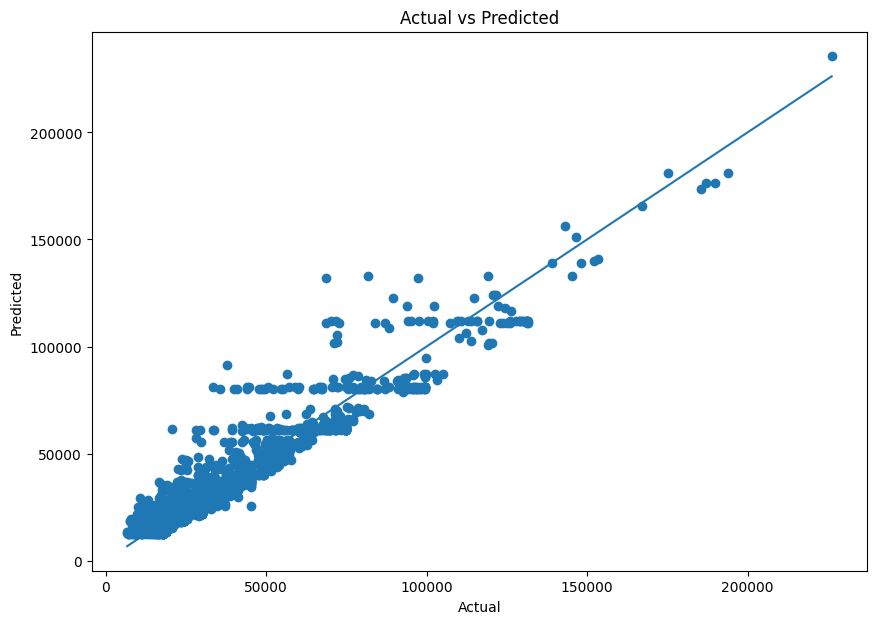


Ridge()

MAE:  5404.244109430569
RMSE:  7956.071532659825
R2:  0.9065689324512962
Explained Variance Score:  0.9065697733399798


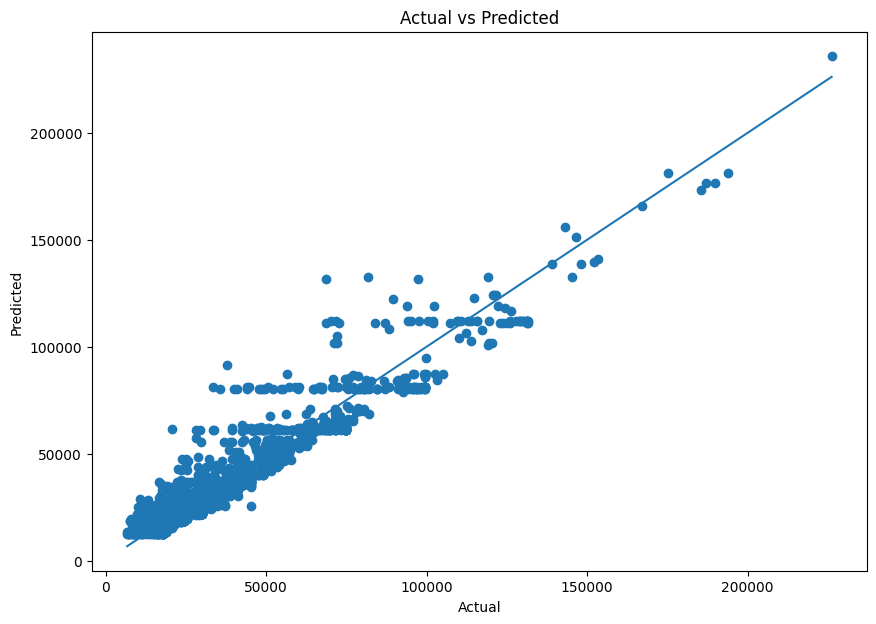


BayesianRidge()

MAE:  5404.954092250589
RMSE:  7956.208015431959
R2:  0.9065657268892484
Explained Variance Score:  0.906566578458318


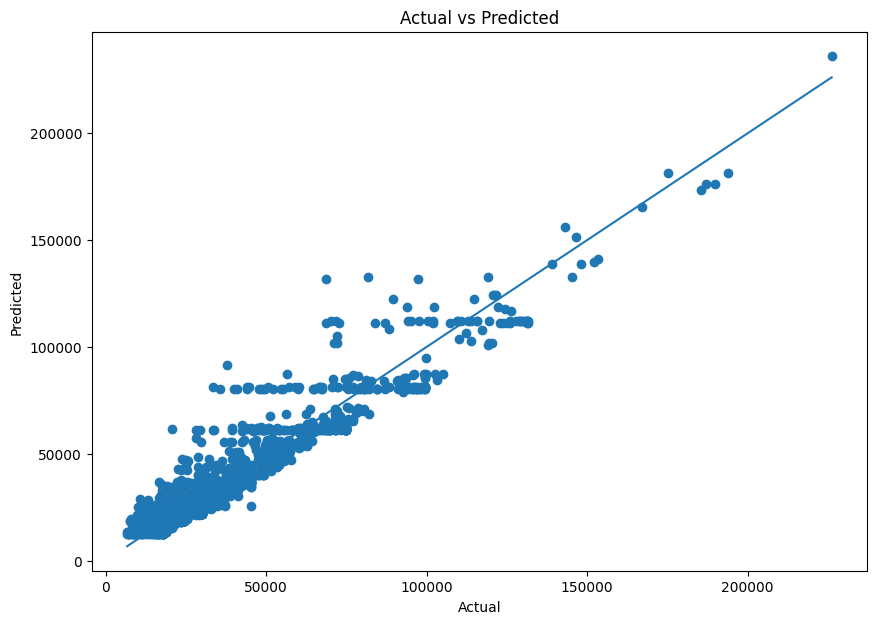


Lasso()

MAE:  5403.624900598108
RMSE:  7955.704915363713
R2:  0.9065775428957887
Explained Variance Score:  0.9065784314798722


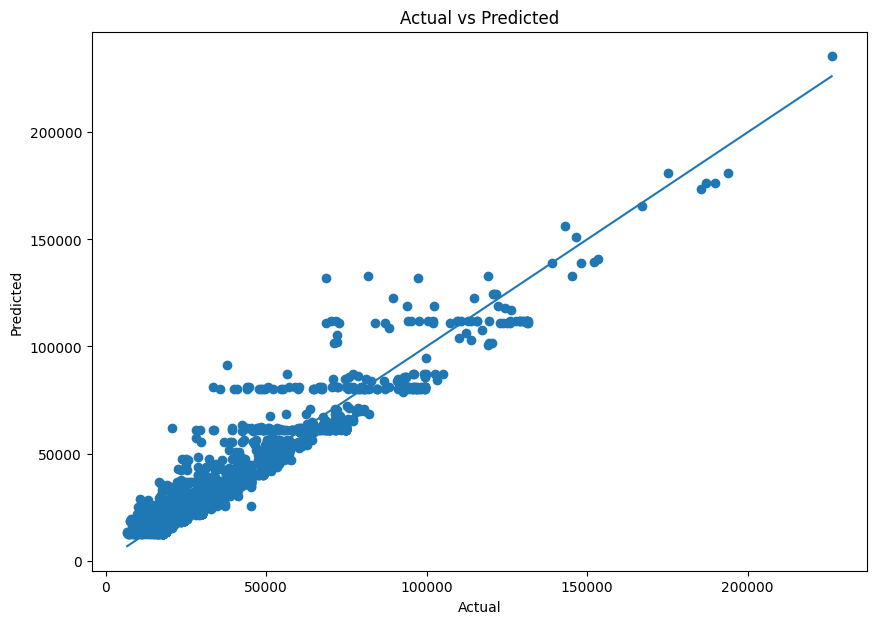


KNeighborsRegressor()

MAE:  5698.120257129923
RMSE:  8714.033472701563
R2:  0.8879188959150524
Explained Variance Score:  0.8879232450167575


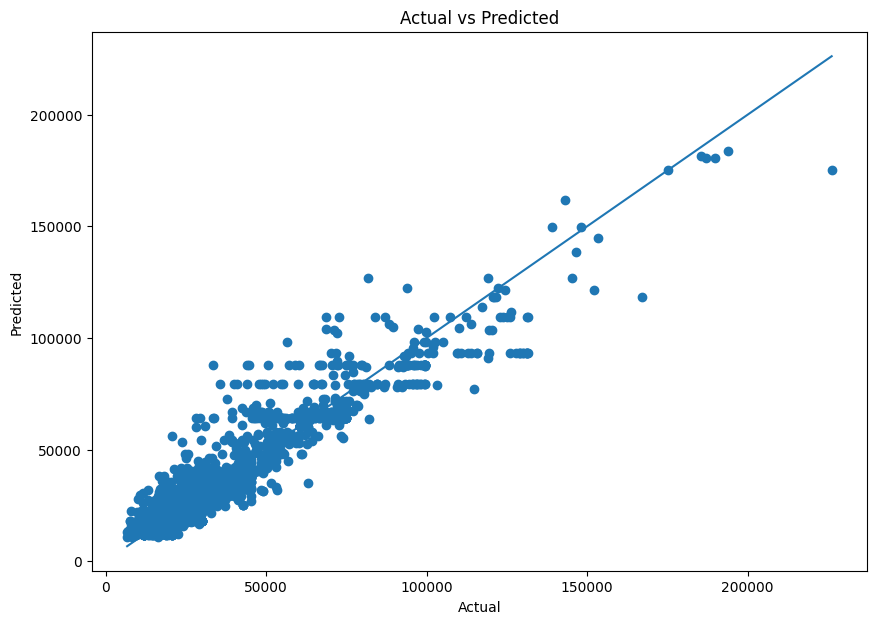


DecisionTreeRegressor()

MAE:  5368.139860577899
RMSE:  8201.826690274504
R2:  0.9007078009951937
Explained Variance Score:  0.9007104908194067


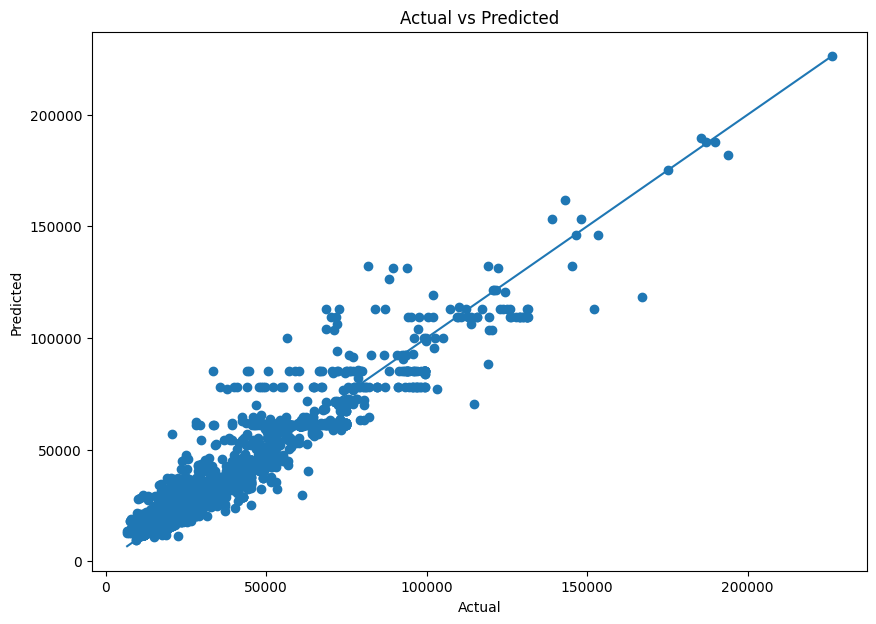


RandomForestRegressor()

MAE:  5274.306112984579
RMSE:  8006.57502079449
R2:  0.9053790057088353
Explained Variance Score:  0.9053793834070186


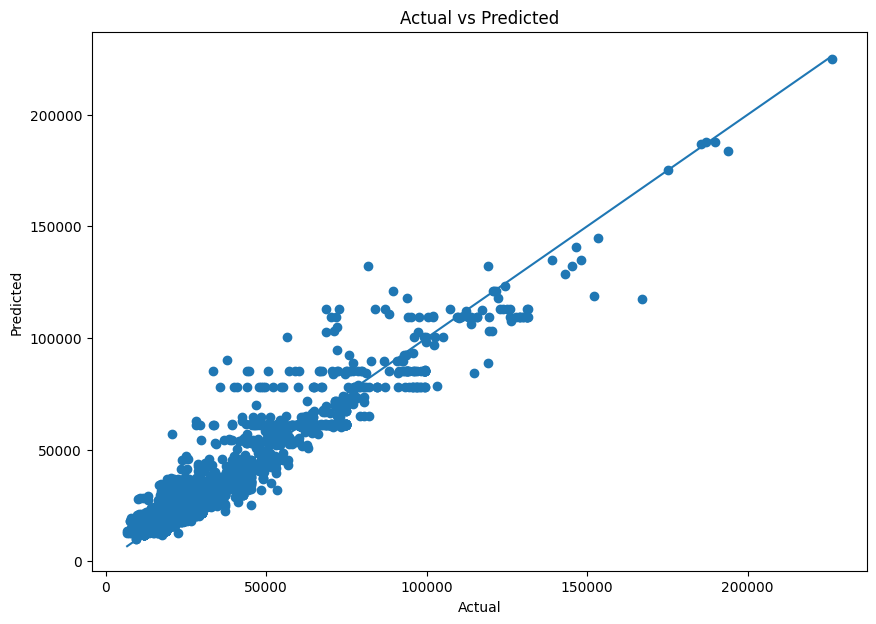


SVR()

MAE:  16222.488944384713
RMSE:  27496.45212988923
R2:  -0.11595651903069704
Explained Variance Score:  0.03193757128447683


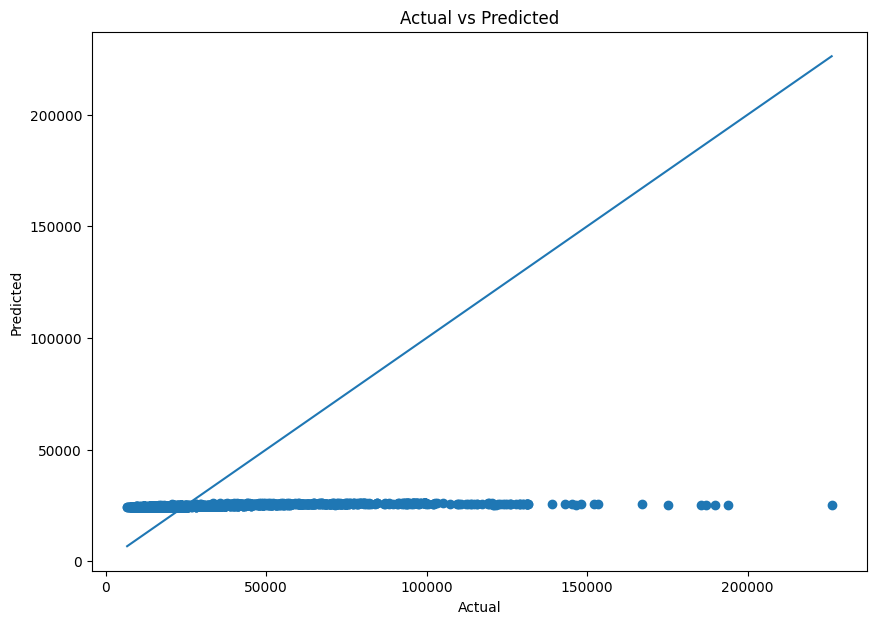


MLPRegressor()

MAE:  11889.977492186668
RMSE:  17970.234632418164
R2:  0.5233479688800355
Explained Variance Score:  0.7028200451965237


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


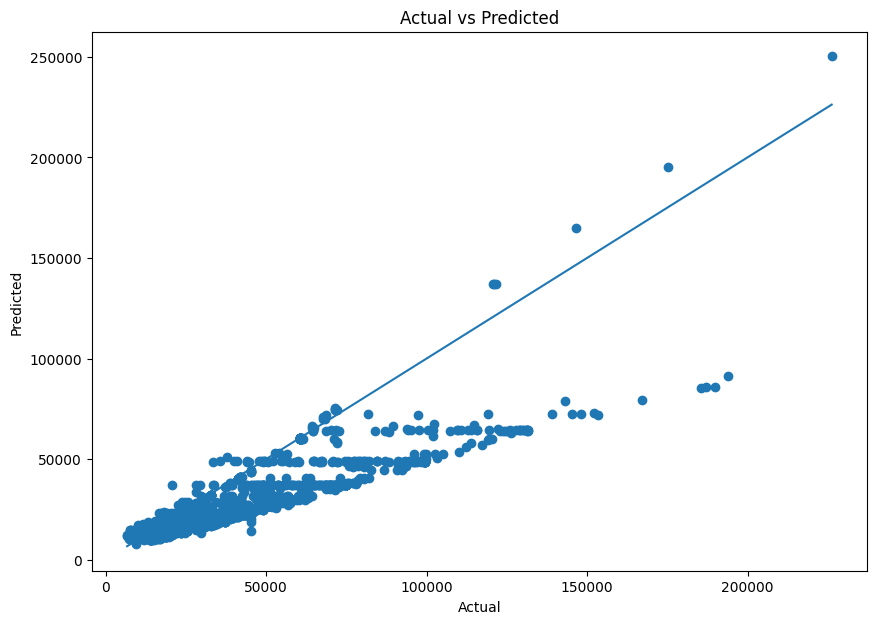


AdaBoostRegressor()

MAE:  6759.248447807114
RMSE:  10280.504603103225
R2:  0.8440006400412072
Explained Variance Score:  0.8440345433959352


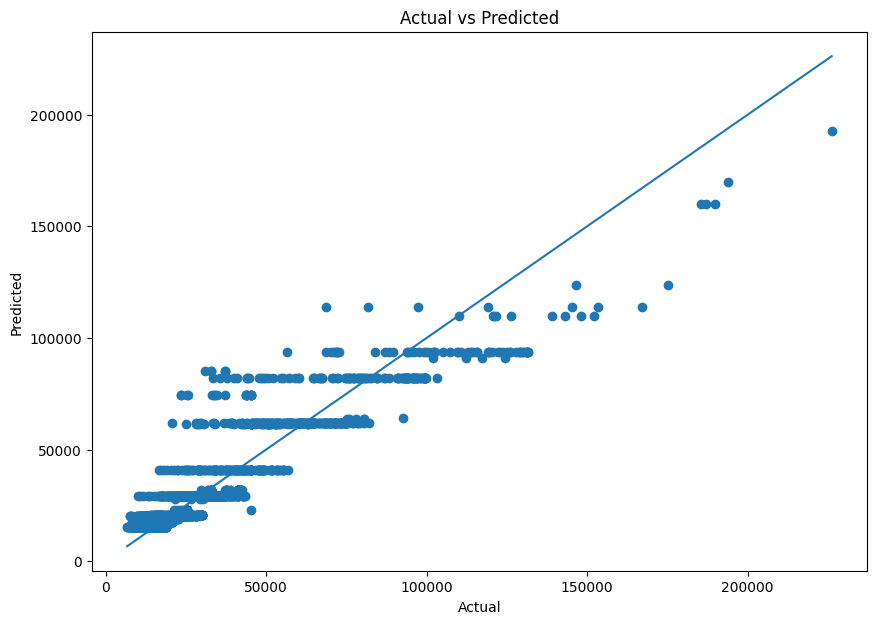

In [1272]:

for model in models:
  model.fit(X_train, y_train)
  y_pred = pd.Series(model.predict(X_test))
  y_pred.index = y_test.index
  print("\n"+ str(model))

  
  print("\nMAE: ", mean_absolute_error(y_test, y_pred))
  print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
  print("R2: ", r2_score(y_test, y_pred) )
  print("Explained Variance Score: ", explained_variance_score(y_test, y_pred))
  
  plt.figure(figsize=(10, 7))
  plt.scatter(y_test, y_pred)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Actual vs Predicted')
  plt.show()

In [1237]:
y_pred = pd.Series(models[1].predict(X_test))
y_pred.index = y_test.index

In [1238]:
results = pd.concat([df.loc[y_test.index], pd.DataFrame(y_pred)], axis=1)
results.columns = list(df.columns)[:-1] + ["Real Sueldo neto", "Predicted neto"]
results

,Ministerio,Cargo,Es_Masculino,Sueldo bruto,AFP,SFS,Real Sueldo neto,Predicted neto
3950,Publico,ANALISTA,0,75000.0,2152.50,2280.00,64233.12,17956.133004
8300,Publico,PROCURADOR,1,210000.0,6027.00,4943.80,144504.05,20605.730788
3780,Publico,SUPERVISOR,1,40000.0,1148.00,1216.00,37168.35,32386.514006
2034,Publico,AGENTE,1,27000.0,774.90,820.80,14968.49,20605.730788
159,Mujer,CHOFER,0,25000.0,717.50,760.00,23497.50,39582.414487
...,...,...,...,...,...,...,...,...
4689,Publico,ENCARGADO,0,180000.0,5166.00,4943.80,114894.39,62042.242011
602,Hacienda,OTROS,1,19600.0,562.52,595.84,18416.64,15171.306763
6926,Publico,PROCURADOR,1,125000.0,3587.50,3800.00,92382.01,80244.955949
4773,Publico,ABOGADO,0,60000.0,1722.00,1824.00,44484.49,61180.159376


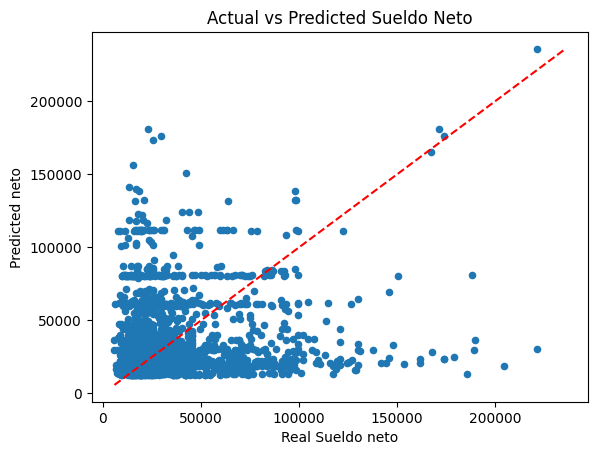

In [1279]:
ax = results.plot(kind='scatter', x='Real Sueldo neto', y='Predicted neto')

# Añadir línea de identidad (y = x)

min_val = min(results['Real Sueldo neto'].min(), results['Predicted neto'].min())
max_val = max(results['Real Sueldo neto'].max(), results['Predicted neto'].max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--')


ax.set_xlabel('Real Sueldo neto')
ax.set_ylabel('Predicted neto')
ax.set_title('Actual Neto vs Predicted Neto')

plt.show()

GRAFICOS

In [1241]:
for x in range (0,models.__len__(),1):
    import pickle
    with open(f"Models/{models[x]}.pkl", "wb") as file:
        pickle.dump(models[x], file)

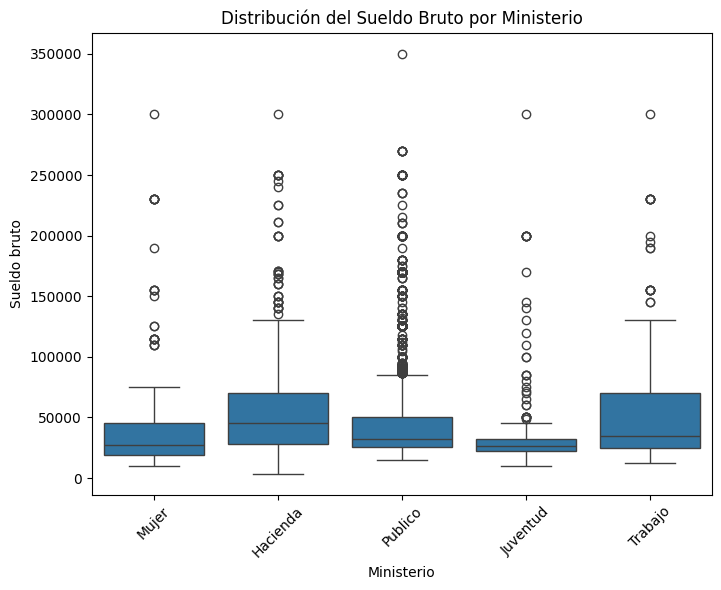

In [1242]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Ministerio', y='Sueldo bruto', data=df_ministerios)
plt.title('Distribución del Sueldo Bruto por Ministerio')
plt.xticks(rotation=45)
plt.show()

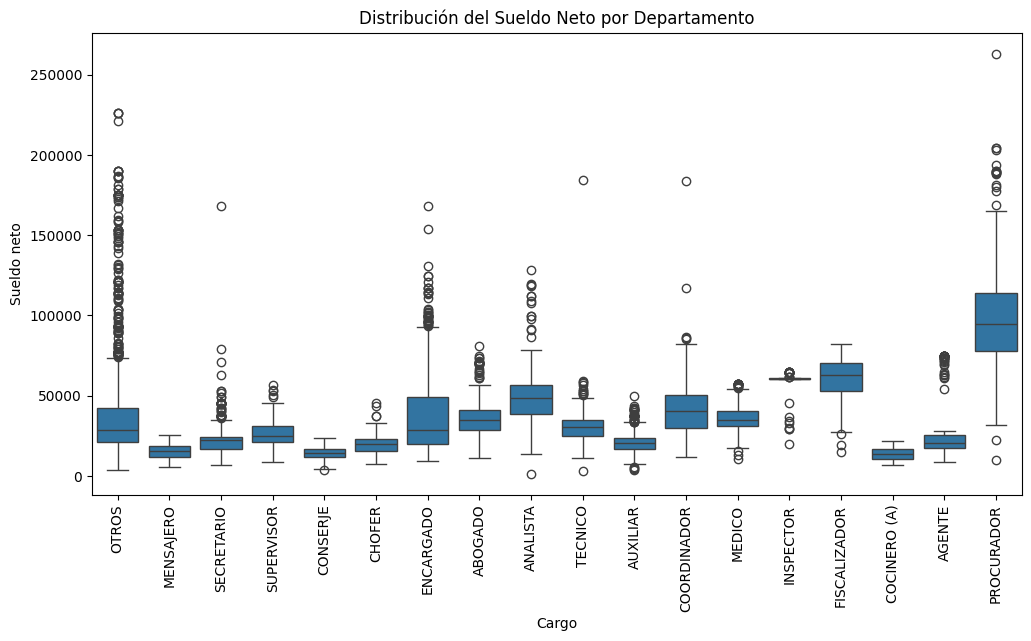

In [1243]:
#distribucion sueldo neto por cargo

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cargo', y='Sueldo neto', data=df_ministerios)
plt.title('Distribución del Sueldo Neto por Departamento')
plt.xticks(rotation=90)
plt.show()

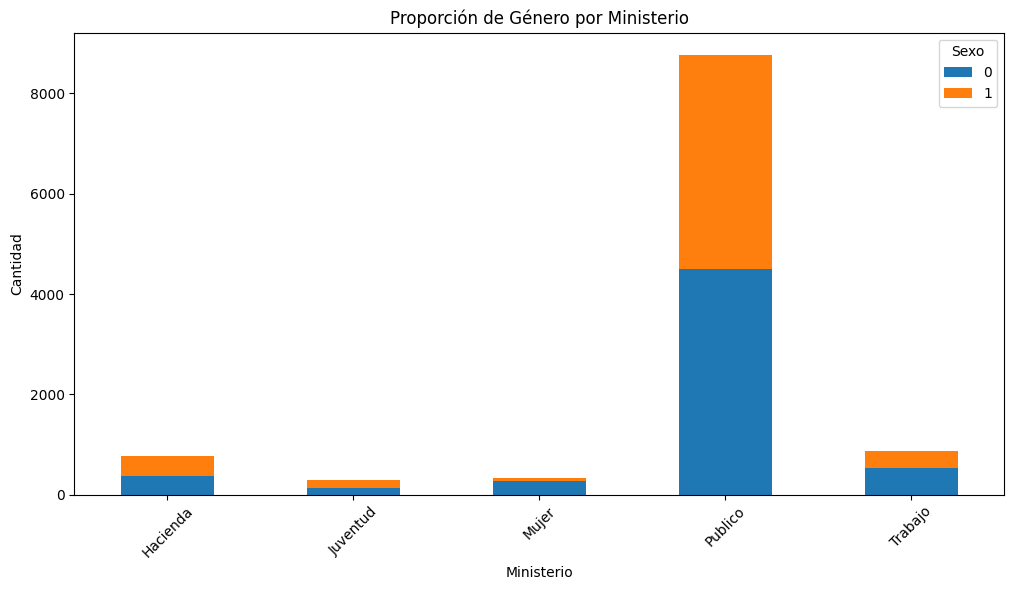

In [1244]:
# Calcular la proporción de género por ministerio
gender_proportion = df_ministerios.groupby(['Ministerio', 'Es_Masculino']).size().unstack().fillna(0)

# Crear el gráfico de barras apiladas
gender_proportion.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Proporción de Género por Ministerio')
plt.xlabel('Ministerio')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()


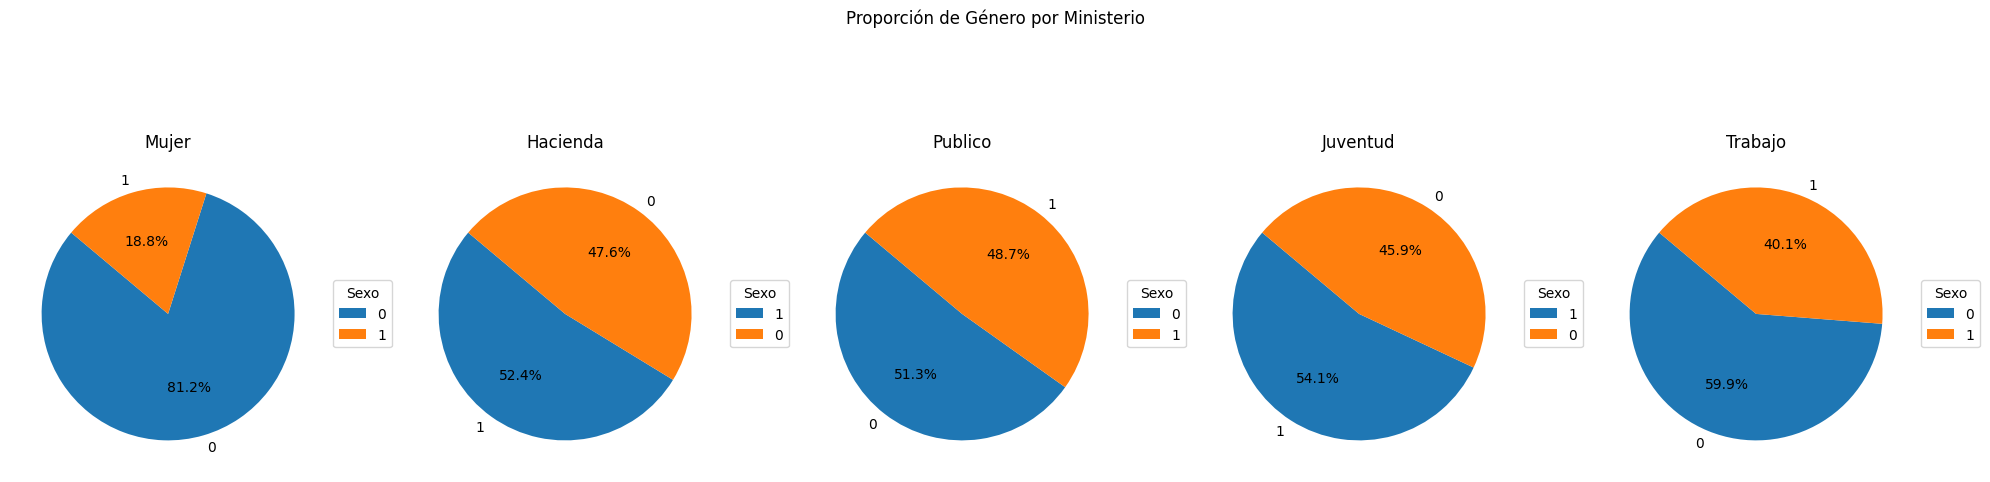

In [1245]:
ministries = df_ministerios['Ministerio'].unique()
fig, axes = plt.subplots(1, len(ministries), figsize=(20, 6), sharey=True)

for i, ministry in enumerate(ministries):
    gender_counts = df_ministerios[df_ministerios['Ministerio'] == ministry]['Es_Masculino'].value_counts()
    wedges, texts, autotexts = axes[i].pie(
        gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        startangle=140
    )
    axes[i].set_title(ministry)
    
    axes[i].legend(
        wedges, 
        gender_counts.index,
        title="Sexo",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1)
    )

plt.suptitle('Proporción de Género por Ministerio')
plt.tight_layout()
plt.show()

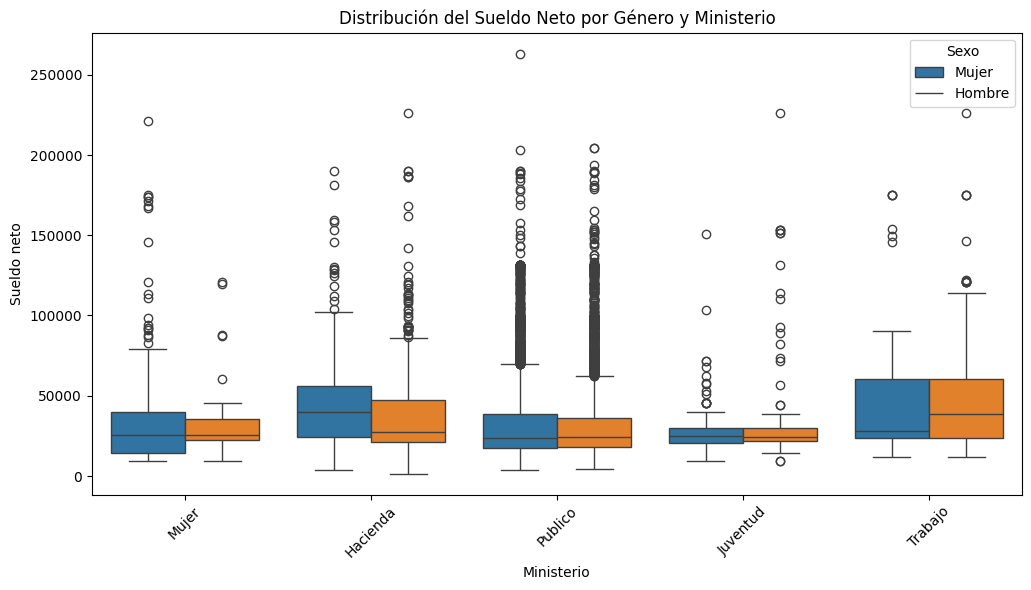

In [1246]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ministerio', y='Sueldo neto', hue='Es_Masculino', data=df_ministerios)
plt.title('Distribución del Sueldo Neto por Género y Ministerio')
plt.xticks(rotation=45)
plt.legend(title='Sexo', labels=['Mujer', 'Hombre'])
plt.show()

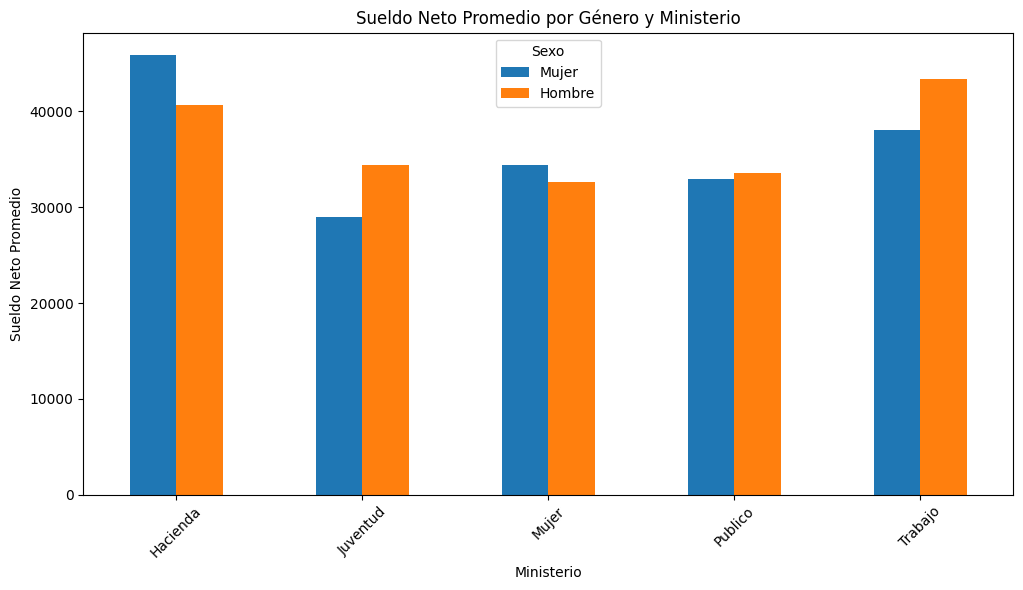

In [1247]:
# Calcular el sueldo neto promedio por género y ministerio
average_salary_by_gender = df_ministerios.groupby(['Ministerio', 'Es_Masculino'])['Sueldo neto'].mean().unstack()

# Crear un gráfico de barras para comparar el sueldo neto promedio por género
average_salary_by_gender.plot(kind='bar', figsize=(12, 6))
plt.title('Sueldo Neto Promedio por Género y Ministerio')
plt.xlabel('Ministerio')
plt.ylabel('Sueldo Neto Promedio')
plt.xticks(rotation=45)
plt.legend(title='Sexo', labels=['Mujer', 'Hombre'])
plt.show()